<a href="https://colab.research.google.com/github/rahulpandey89/Age_and_Gender_Prediction/blob/master/Florence_2_ocr_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install flash_attn -q timm -q
!pip install accelerate -q
!pip install einops -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 42.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
!mkdir my_models
!mkdir my_models/Florence_2

In [3]:
from transformers import AutoModelForCausalLM, AutoProcessor


model = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-large-ft",
                                             cache_dir="/content/my_models/Florence_2",
                                             device_map="cuda",
                                             trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large-ft:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large-ft:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


pytorch_model.bin:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

Florence2LanguageForConditionalGeneration has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.


generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

In [10]:
processor = AutoProcessor.from_pretrained("microsoft/Florence-2-large-ft",
                                             cache_dir="/content/my_models/Florence_2",
                                             trust_remote_code=True)

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large-ft:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

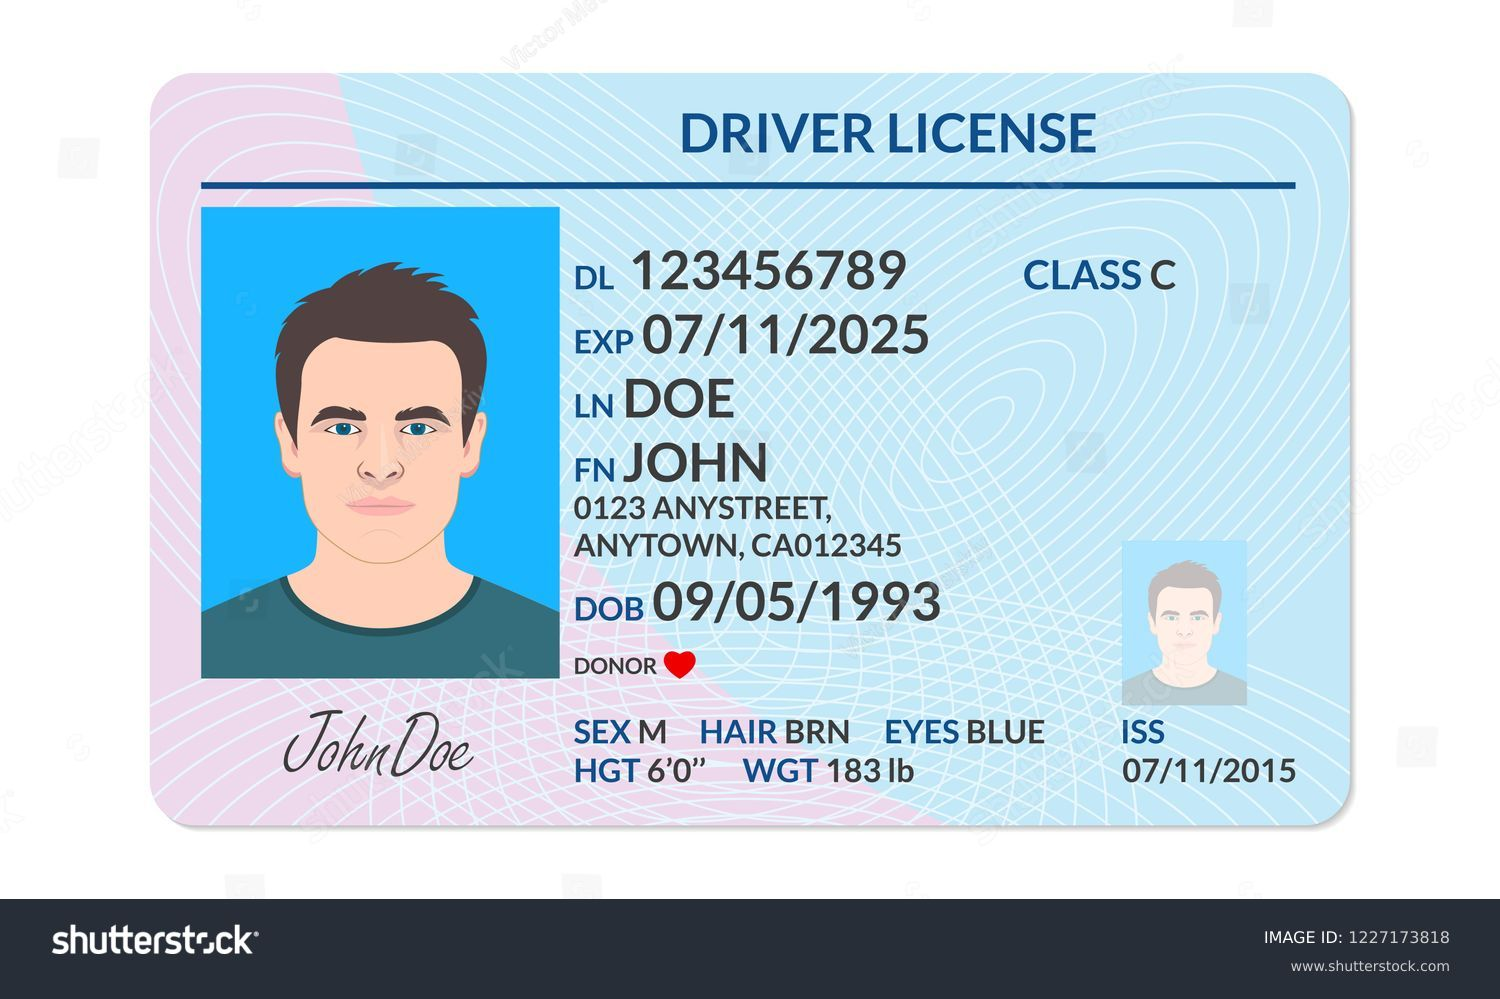

In [19]:
import requests
from PIL import Image

#url = "https://templates.invoicehome.com/invoice-template-us-dexter-750px.png"
url='/content/dl.jpg'
#image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
image = Image.open(url).convert("RGB")
image

In [20]:
prompt = '<OCR_WITH_REGION>'

inputs = processor(text=prompt, images=image, return_tensors="pt").to("cuda:0")

In [21]:
inputs

{'input_ids': tensor([[   0, 2264,   16,    5, 2788,   11,    5, 2274,    6,   19, 3806,  116,
            2]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0'), 'pixel_values': tensor([[[[ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
          [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
          [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
          ...,
          [-1.4500, -1.4500, -1.4500,  ..., -1.4500, -1.4500, -1.4500],
          [-1.4500, -1.4500, -1.4500,  ..., -1.4500, -1.4500, -1.4500],
          [-1.4500, -1.4500, -1.4500,  ..., -1.4500, -1.4500, -1.4500]],

         [[ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
          [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
          [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
          ...,
          [-1.2304, -1.2304, -1.2304,  ..., -1.2304, -1.2304, -1.2304],
          [-1.23

In [22]:
%%time
generated_ids = model.generate(
      input_ids=inputs["input_ids"],
      pixel_values=inputs["pixel_values"],
      max_new_tokens=4096,
      num_beams=3
    )

CPU times: user 4.17 s, sys: 0 ns, total: 4.17 s
Wall time: 4.2 s


In [23]:
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
generated_text

'</s><s><s><s>Vector Mater<loc_330><loc_57><loc_402><loc_0><loc_413><loc_0><loc_341><loc_77>DRIVER LICENSE<loc_452><loc_109><loc_733><loc_109><loc_733><loc_157><loc_452><loc_157>DL 123456789<loc_381><loc_248><loc_605><loc_246><loc_605><loc_293><loc_381><loc_295>CLASS C<loc_681><loc_256><loc_786><loc_256><loc_786><loc_293><loc_681><loc_293>EXP 07/11/2025<loc_381><loc_313><loc_621><loc_310><loc_621><loc_357><loc_381><loc_360>LN DOE<loc_381><loc_378><loc_491><loc_376><loc_492><loc_420><loc_381><loc_423>FN JOHN<loc_381><loc_441><loc_513><loc_440><loc_513><loc_484><loc_381><loc_486>utterste<loc_0><loc_492><loc_80><loc_381><loc_98><loc_415><loc_0><loc_526>0123 ANYSTREET,<loc_381><loc_493><loc_555><loc_493><loc_555><loc_523><loc_381><loc_523>tterste<loc_896><loc_475><loc_973><loc_381><loc_991><loc_411><loc_914><loc_506>ANYTOWN, CA012345<loc_381><loc_530><loc_602><loc_530><loc_602><loc_561><loc_381><loc_561>DOB 09/05/1993<loc_381><loc_579><loc_629><loc_578><loc_629><loc_626><loc_381><loc_627>D

In [27]:
parsed_answer = processor.post_process_generation(generated_text, task=prompt, image_size=(image.width, image.height))
parsed_answer['<OCR_WITH_REGION>']

{'quad_boxes': [[495.75,
   57.442501068115234,
   603.75,
   0.49950000643730164,
   620.25,
   0.49950000643730164,
   512.25,
   77.42250061035156],
  [678.75,
   109.3905029296875,
   1100.25,
   109.3905029296875,
   1100.25,
   157.34249877929688,
   678.75,
   157.34249877929688],
  [572.25,
   248.2515106201172,
   908.25,
   246.25350952148438,
   908.25,
   293.2065124511719,
   572.25,
   295.2044982910156],
  [1022.25,
   256.2434997558594,
   1179.75,
   256.2434997558594,
   1179.75,
   293.2065124511719,
   1022.25,
   293.2065124511719],
  [572.25,
   313.1864929199219,
   932.25,
   310.18951416015625,
   932.25,
   357.14251708984375,
   572.25,
   360.1394958496094],
  [572.25,
   378.1214904785156,
   737.25,
   376.1235046386719,
   738.75,
   420.0794982910156,
   572.25,
   423.0765075683594],
  [572.25,
   441.0585021972656,
   770.25,
   440.05950927734375,
   770.25,
   484.0155029296875,
   572.25,
   486.0135192871094],
  [0.75,
   492.00750732421875,
   120

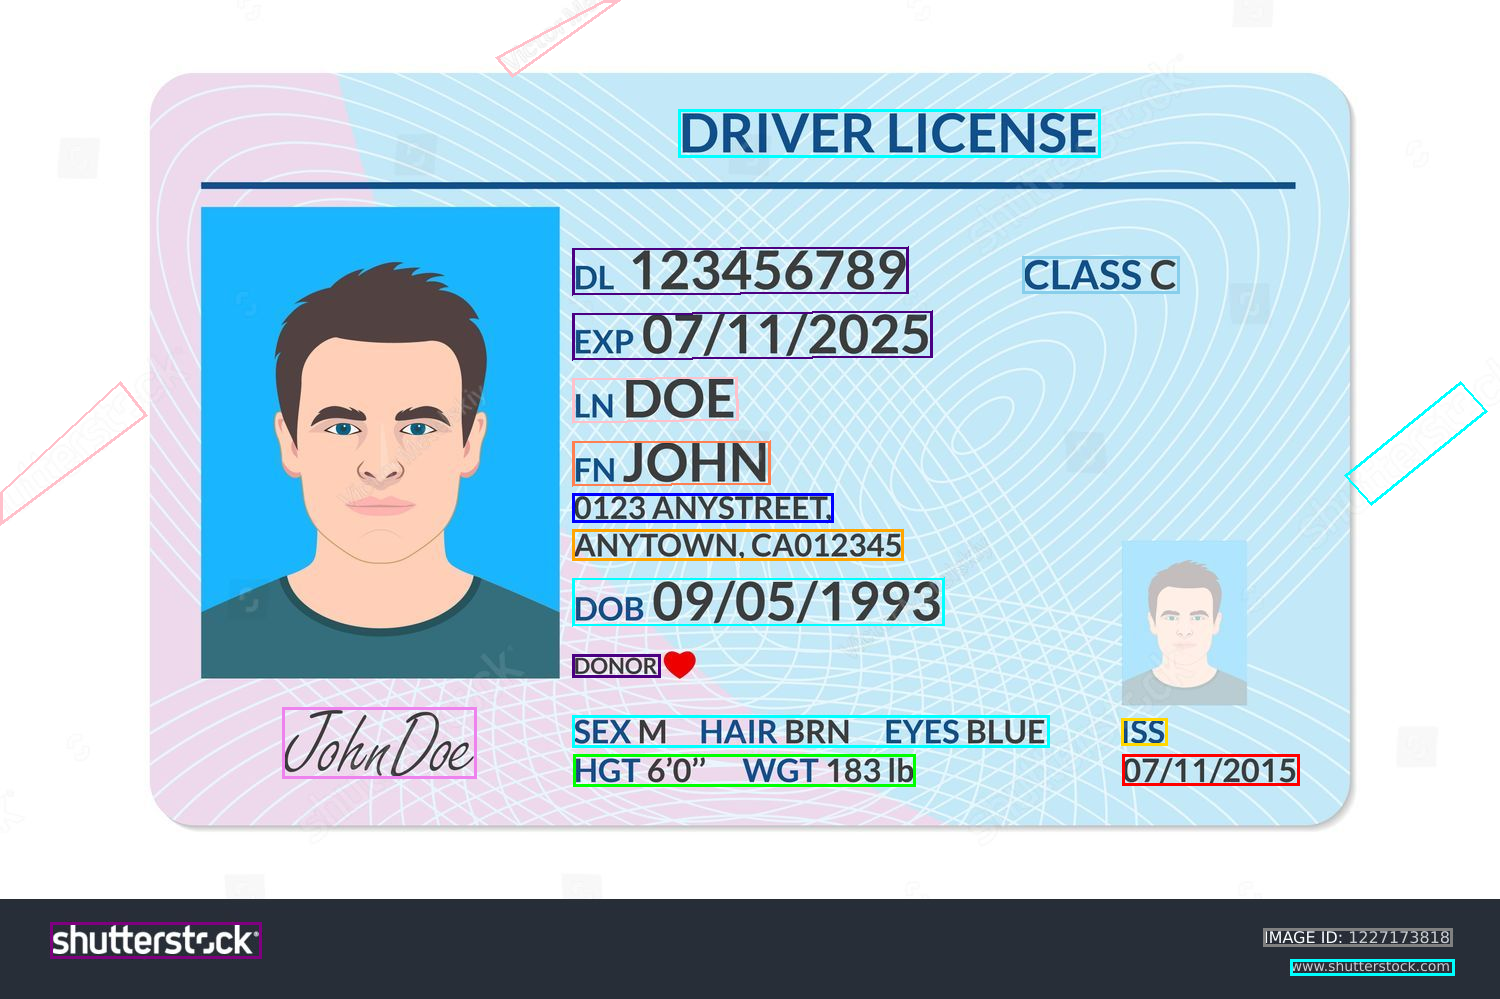